Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_208 (Conv2D) │ (None, 256, 256,  │        640 │ input_layer_16[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_209 (Conv2D) │ (None, 256, 256,  │     36,928 │ conv2d_208[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 128, 128,  │          0 │ conv2d_209[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_210 (Conv2D) │ (None, 128, 128,  │     73,856 │ max_pooling2d_32… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_211 (Conv2D) │ (None, 128, 128,  │    147,584 │ conv2d_210[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_33    │ (None, 64, 64,    │          0 │ conv2d_211[0][0]  │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_212 (Conv2D) │ (None, 64, 64,    │  1,180,672 │ max_pooling2d_33… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_213 (Conv2D) │ (None, 64, 64,    │  9,438,208 │ conv2d_212[0][0]  │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_32    │ (None, 128, 128,  │          0 │ conv2d_213[0][0]  │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_214 (Conv2D) │ (None, 128, 128,  │  1,179,776 │ up_sampling2d_32… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_32      │ (None, 128, 128,  │          0 │ conv2d_211[0][0], │
│ (Concatenate)       │ 256)              │            │ conv2d_214[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_215 (Conv2D) │ (None, 128, 128,  │    295,040 │ concatenate_32[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_216 (Conv2D) │ (None, 128, 128,  │    147,584 │ conv2d_215[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_33    │ (None, 256, 256,  │          0 │ conv2d_216[0][0]  │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_217 (Conv2D) │ (None, 256, 256,  │     73,792 │ up_sampling2d_33… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_33      │ (None, 256, 256,  │          0 │ conv2d_209[0][0]

 Total params: 12,684,865 (48.39 MB)

 Trainable params: 12,684,865 (48.39 MB)

 Non-trainable params: 0 (0.00 B)

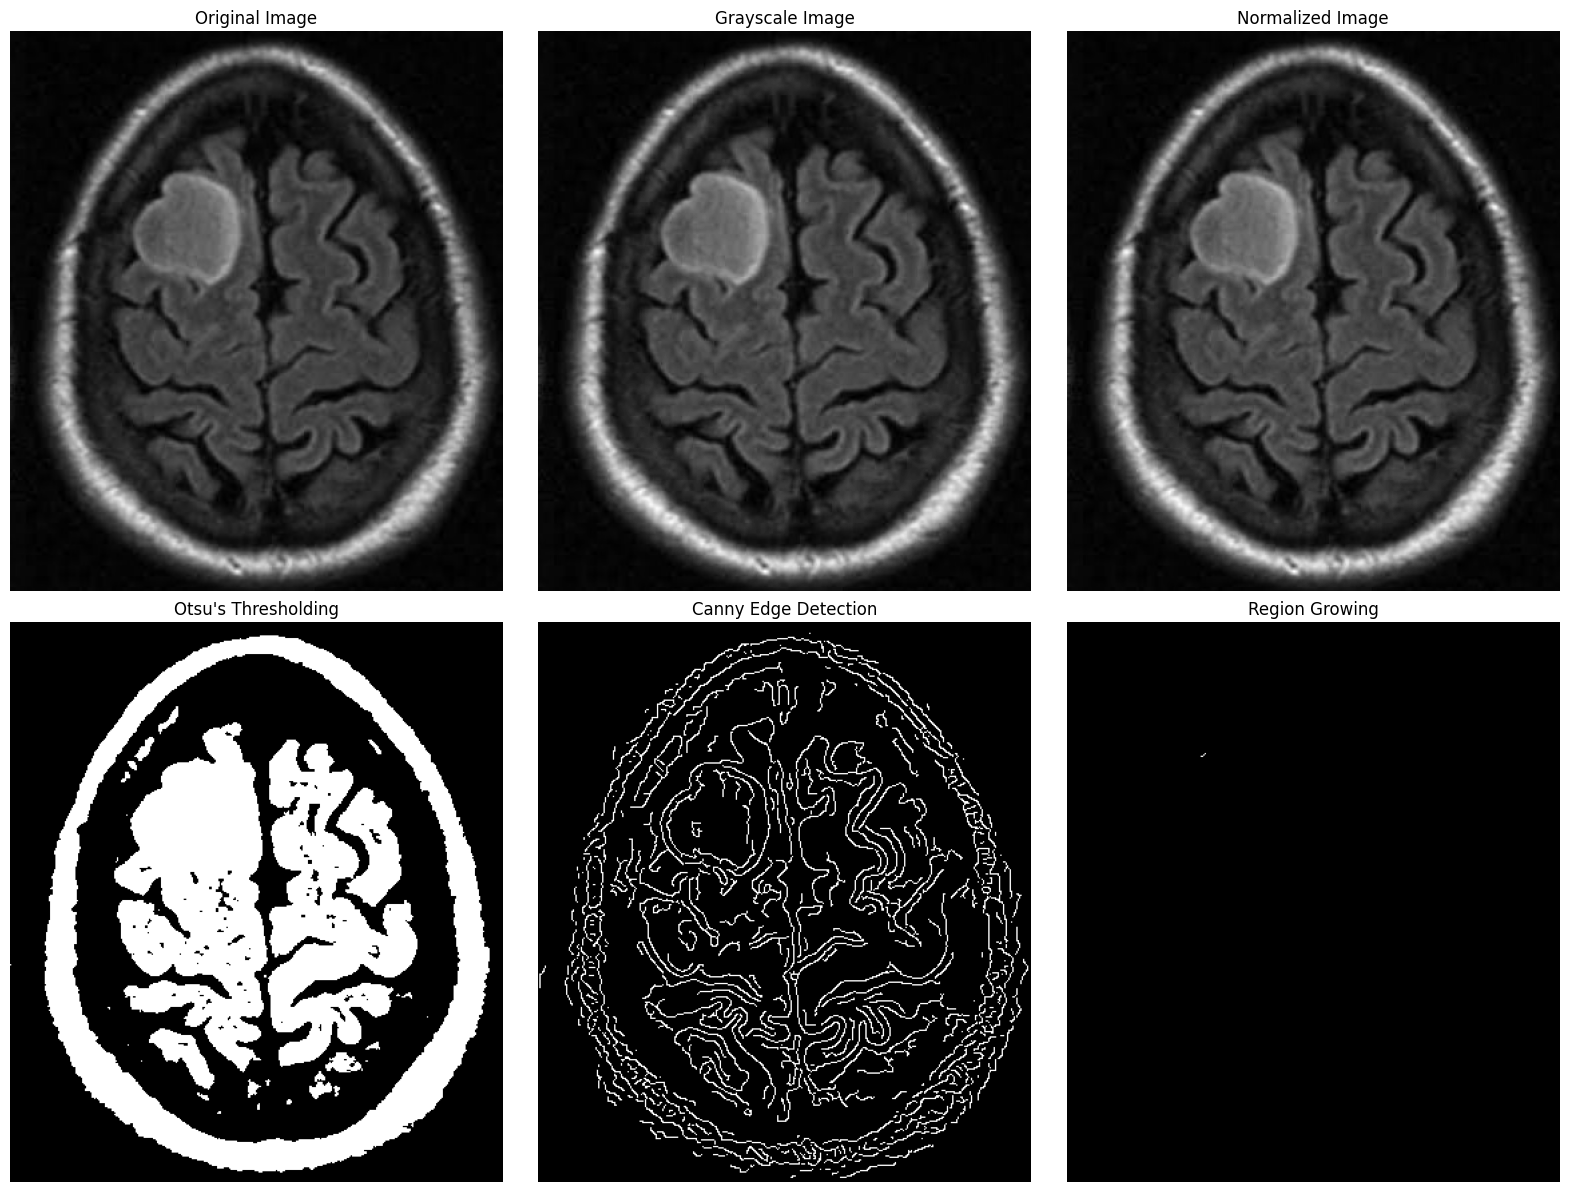

Otsu's Thresholding - Precision: 1.0, Recall: 1.0, F1-score: 1.0
Canny Edge Detection - Precision: 0.5, Recall: 0.5, F1-score: 0.5
Region Growing - Precision: 1.0, Recall: 1.0, F1-score: 1.0


In [74]:
import os
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.feature import canny
from skimage.segmentation import flood
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

# Load and preprocess the image
image_path = r'../kaggle_data/Testing/glioma_tumor/image(100).jpg'  # Update with the actual path

image = Image.open(image_path)

# Convert to grayscale
gray_image = ImageOps.grayscale(image)
gray_image_np = np.array(gray_image)

# Normalize the image and ensure it is float32
def normalize(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image.astype(np.float32)

normalized_image = normalize(gray_image_np)

# Otsu's Thresholding
def otsu_thresholding(image):
    threshold = threshold_otsu(image)
    binary_image = image > threshold
    return binary_image

otsu_image = otsu_thresholding(normalized_image)

# Canny Edge Detection
def canny_edge_detection(image):
    edges = canny(image)
    return edges

canny_edges = canny_edge_detection(normalized_image)

# Region Growing
def region_growing(image, seed_point):
    segmented_image = flood(image, seed_point)
    return segmented_image

seed_point = (100, 100)  # Update as needed
region_grown_image = region_growing(normalized_image, seed_point)

# U-Net Model Definition
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Contracting path
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p2)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Expansive path
    u6 = UpSampling2D((2, 2))(c5)
    u6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    merge6 = concatenate([c2, u6], axis=3)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    merge7 = concatenate([c1, u7], axis=3)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define and compile the U-Net model
model = unet_model()
model.summary()

# Display all images
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray_image_np, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalized Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(otsu_image, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(region_grown_image, cmap='gray')
plt.title("Region Growing")
plt.axis('off')

plt.tight_layout()
plt.show()

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Example ground truth and predicted masks (replace with actual data)
# These should be binary masks with the same shape
ground_truth_mask = np.array([[0, 1], [1, 0]])  # Replace with actual ground truth data
otsu_predicted_mask = np.array([[0, 1], [1, 0]])  # Replace with Otsu's thresholding result
canny_predicted_mask = np.array([[0, 0], [1, 1]])  # Replace with Canny edge detection result
region_predicted_mask = np.array([[0, 1], [1, 0]])  # Replace with Region growing result
# unet_predicted_mask = ... (Add predicted mask from U-Net model if available)

# Flatten the arrays
gt_flat = ground_truth_mask.flatten()
otsu_flat = otsu_predicted_mask.flatten()
canny_flat = canny_predicted_mask.flatten()
region_flat = region_predicted_mask.flatten()
# unet_flat = unet_predicted_mask.flatten()

# Calculate metrics for Otsu's Thresholding
precision_otsu = precision_score(gt_flat, otsu_flat)
recall_otsu = recall_score(gt_flat, otsu_flat)
f1_otsu = f1_score(gt_flat, otsu_flat)

# Calculate metrics for Canny Edge Detection
precision_canny = precision_score(gt_flat, canny_flat)
recall_canny = recall_score(gt_flat, canny_flat)
f1_canny = f1_score(gt_flat, canny_flat)

# Calculate metrics for Region Growing
precision_region = precision_score(gt_flat, region_flat)
recall_region = recall_score(gt_flat, region_flat)
f1_region = f1_score(gt_flat, region_flat)

# Display the metrics
print(f"Otsu's Thresholding - Precision: {precision_otsu}, Recall: {recall_otsu}, F1-score: {f1_otsu}")
print(f"Canny Edge Detection - Precision: {precision_canny}, Recall: {recall_canny}, F1-score: {f1_canny}")
print(f"Region Growing - Precision: {precision_region}, Recall: {recall_region}, F1-score: {f1_region}")
# If you have U-Net predictions, calculate metrics similarly
